<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/Week_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/CLV.csv")


In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
# Separate features and response
X = df.drop(["Unnamed: 0", "Customer Lifetime Value"], axis = 1)
y = df["Customer Lifetime Value"]

In [ ]:
# Separate training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale features (input data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize model
clf = MLPRegressor(max_iter=1000)

In [ ]:
# Set up grid for tuning hyper-parameters
params = {
    "hidden_layer_sizes": [(5,), (25,5,), (15,35,10,)],
    "activation": ['relu', 'logistic'],
    "learning_rate_init": [0.0001, 0.001]
}

NOTE:
- (5,) denotes 1 hidden layer with 5 neurons
- (25,5,) denotes 2 hidden layers with 25 and 5 neurons in each layer respectively
- (15,35,10,) denotes 3 hidden layers with 15, 35, and 10 neurons in each layer respectively

In [ ]:
# Set up CV
grid = GridSearchCV(
    clf,
    params,
    cv = 5,
    # Refit the best model on the whole data set
    refit = True
)

# Fit CV
grid.fit(X_train, y_train)

# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
# Best model parameters
grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (25, 5),
 'learning_rate_init': 0.001}

In [ ]:
# Best CV R2 score
grid.best_score_

0.14853605146653084

In [ ]:
# Model with optimal solution
regressor = MLPRegressor(
    hidden_layer_sizes=(25, 5,),
    activation = 'relu',
    learning_rate_init = 0.001
)
# Equivalent to MLPRegressor(**grid.best_params_)

# Fit model
regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(25, 5))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_in = regressor.predict(X_train) # in-sample
y_pred = regressor.predict(X_test) # out-of-sample

# In-Sample MSE
in_mse = mean_squared_error(y_train, y_pred_in)
print("In-Sample MSE:", in_mse)

# Out-of-Sample MSE
out_mse = mean_squared_error(y_test, y_pred)
out_r2 = r2_score(y_test, y_pred)
print("Out-of-Sample MSE:", out_mse)
print("Out-of-Sample R2:", out_r2)

In-Sample MSE: 43088796.8080357
Out-of-Sample MSE: 44549131.91118045
Out-of-Sample R2: 0.08122548111594619


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialize model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(25, input_dim = X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(5, activation='relu'))

# Output layer (linear activation function for output because regression)
model.add(Dense(1, activation='linear'))

# Compile and optimize model
model.compile(loss = 'mse', optimizer = Adam(lr = 0.001))

# Train model
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 [==============================] - 1s 1ms/step - loss: 110653728.0000
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 110139048.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 108035784.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 103326928.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 95775464.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 86141624.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 75756856.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 66199612.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 58664176.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 53565304.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 50568524.0000
Epoch 12/100
200/200 [=====

In [126]:
# Save model
keras.models.save_model(model, "/content/gdrive/MyDrive/Econ441B")

In [ ]:
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                425       
                                                                 
 dense_9 (Dense)             (None, 5)                 130       
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

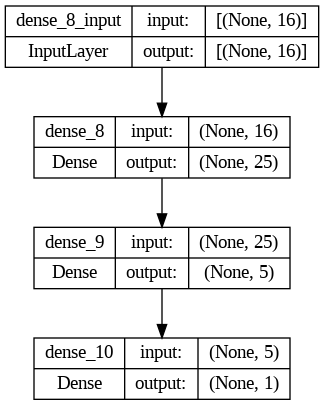

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [129]:
from ann_visualizer.visualize import ann_viz
from keras.models import load_model
mod = keras.models.load_model("/content/gdrive/MyDrive/Econ441B/NN_model.h5")
ann_viz(model, title = "CLV NN Viz", view = True, filename = "/content/gdrive/MyDrive/Econ441B/saved_model.pb")

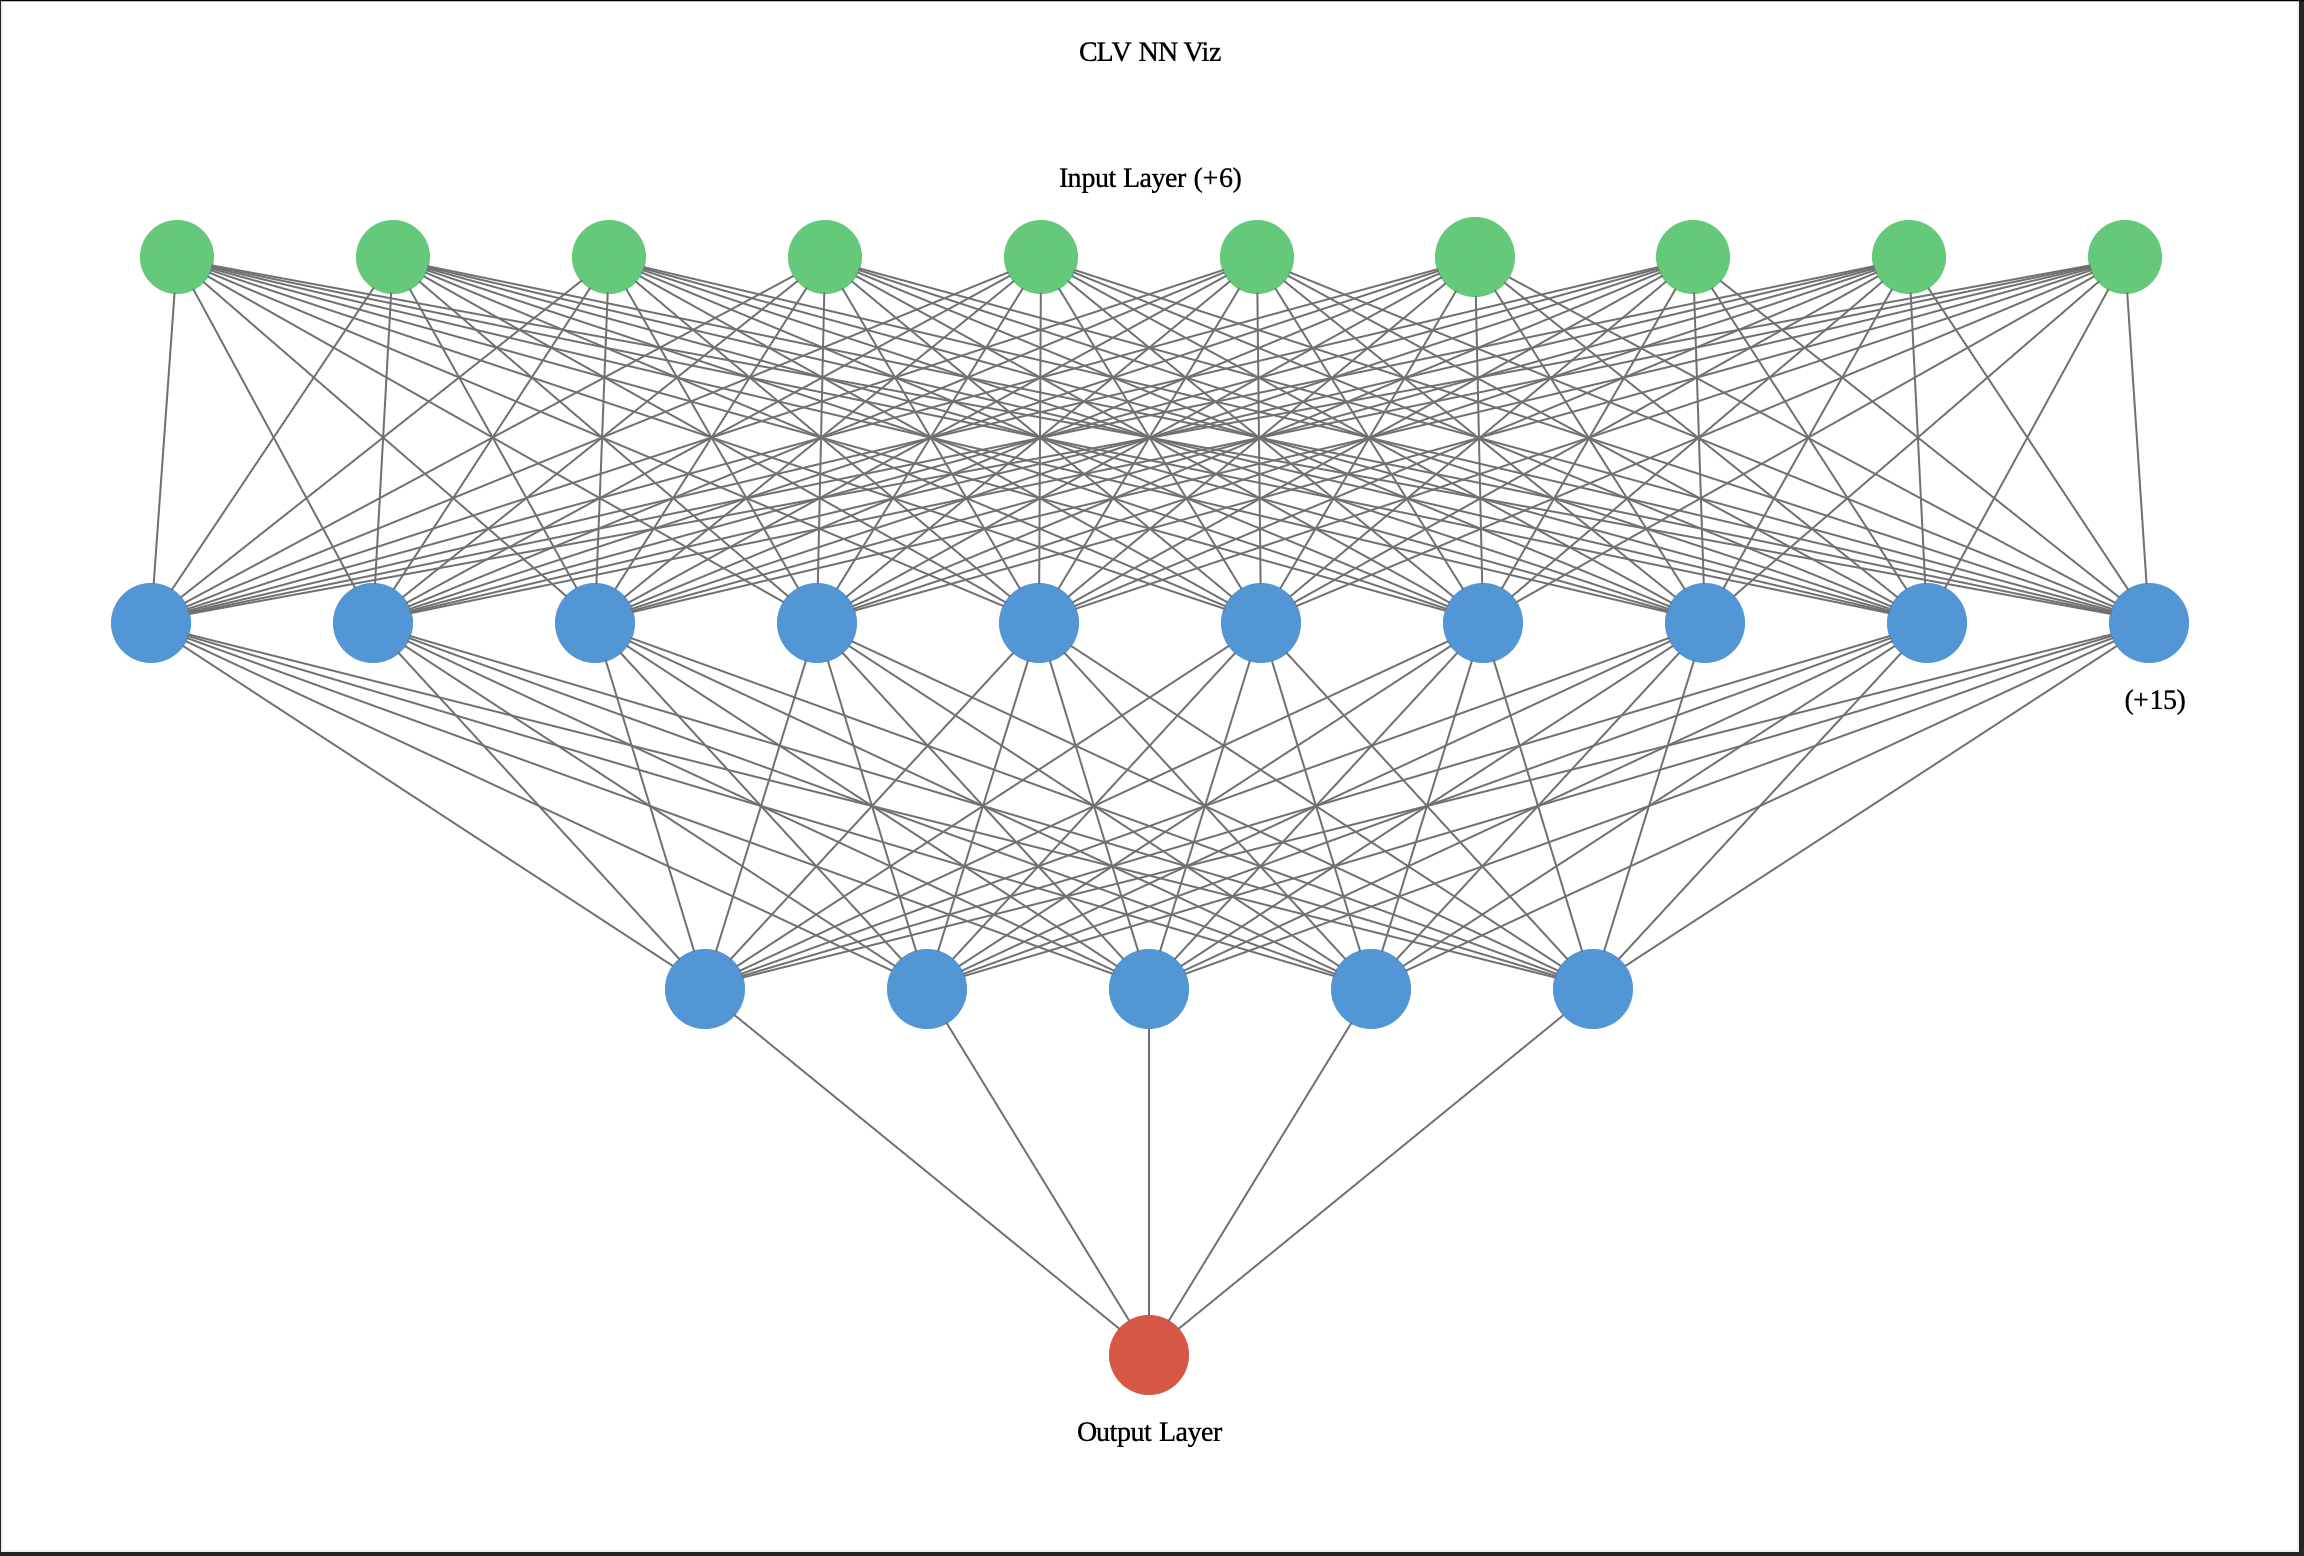